# First example with real images

The goal of this exercice is to train an artificial neural network on images of **handwritten digits** and check that the trained network is able to identify and classify new images that it did not see during the training.
We will use the **MNIST** database, which contains 60.000 images (28x28 pixels) for training and 10.000 for testing. 

This notebook was inspired from the EMBL notebooks from the Kreshuk lab (https://github.com/kreshuklab/teaching-dl-course-2020/).

## I - Downloading the MNIST image database

First step - we will import the MNIST database. 

In [1]:
from tensorflow import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Below, a set of 3 randomly selected images is displayed. For each image, the associated **label** (its real class, the ground truth) is indicated on the top. 

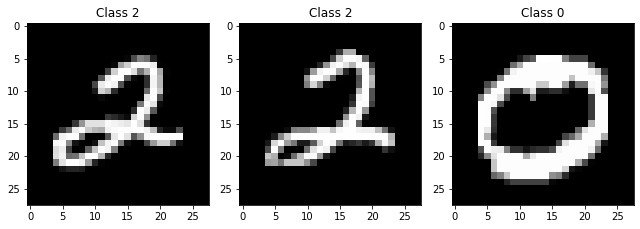

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import random

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(3):
    plt.subplot(1,3,i+1)
    num = random.randint(0, len(train_images))
    plt.imshow(train_images[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(train_labels[num]))
    
plt.tight_layout()

And the size of the images is indicated :

In [3]:
im = train_images[0]
print('The size of the image is {} pixels'.format(im.shape))
print('The minimum pixel value is {} and the maxium  {}'.format(np.min(im), np.max(im)))

The size of the image is (28, 28) pixels
The minimum pixel value is 0 and the maxium  255


## II - Formatting the data

For the moment, we do not know how to work with 2D images. 
In the MNIST database, each image is composed of 28x28 pixels. The intensity is encoded in 8-bit, meaning that the intensity value of each pixel will be between 0 and 255=2⁸-1. 
For the input layer of the network, we need to transform those **images** into a **single-column tensor composed of 28x28=784 elements**. Each image is going to be **reshaped** or **flatten**. 

The data are also **normalized** so that all the values will be between 0 and 1.

In [4]:
# the images are flatten into one single tensor containing 784 elements. The 
# images are also converted to float to allow for the normalization (else,
# if we keep the integer formation, the result of the normalization will be
# either 0 or 1)
# -------------

X_train = train_images.reshape(train_images.shape[0], 784).astype('float32')
X_val = test_images.reshape(test_images.shape[0], 784).astype('float32')

# normalize inputs from 0-255 to 0-1
# ----------------------------------

X_train /= 255
X_val /= 255

The labels are also changed from **single digit** to **categorical or one-hot format**. Example:

class "0" : [**1** 0 0 0 0 0 0 0 0 0]

class "1" : [0 **1** 0 0 0 0 0 0 0 0]

etc..

In [5]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(train_labels)
Y_val = np_utils.to_categorical(test_labels)

for n in range(5):
  print("The previous label was " + str(train_labels[n]) + " and is now " + str(Y_train[n]))

The previous label was 5 and is now [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The previous label was 0 and is now [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The previous label was 4 and is now [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The previous label was 1 and is now [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The previous label was 9 and is now [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## III- Creating and training a simple network for digit classification

We will now build a simple network able to read the modify images as input and return a vector (in the "one-hot" format) indicating the predicted class for the image. 
For now, the structure of this network remains very similar to what we have already seen yesterday. 

In [6]:
# Import the keras libraries 
# --------------------------
from keras.models import Sequential # Model type to be used
from keras.layers import Dense # Type of layers to be used in the network
from keras import optimizers

# Define the architecture of the network. Note that the activation function for 
# the last layer is "softmax", which gives the probability for each of the 10 classes
# ---------------------------

model = Sequential([
                    
  Dense(10, activation = 'relu', input_shape=(784,)),
  Dense(10, activation = 'softmax'),
]) 

# Compile the model defining the optimizer and the loss function 
# --------------------------------------------------------------
model.compile(optimizer = 'adam', 
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

# Return a full description of the network
# ----------------------------------------
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


(Optional) 

In order to find the best network architecture for your problem, many training will be performed and compared. TensorFlow offers several vizualization tools to facilitate this task. 

TensorBoard provides the visualization and tooling needed for machine learning experimentation:
*   Tracking and visualizing metrics such as loss and accuracy
*   Visualizing the model graph (ops and layers)
*   Viewing histograms of weights, biases, or other tensors as they change over time
*   Projecting embeddings to a lower dimensional space
*   Displaying images, text, and audio data
*   Profiling TensorFlow programs
*   And much more

After running the following block, you should click on the generated link.

In [7]:
from keras.callbacks import TensorBoard  #Visulization of Accuracy and loss

# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
%load_ext tensorboard

tb_FC = TensorBoard('runs/MNIST_dense_model', histogram_freq=1)
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

Finallly, we are going to train the model (with `model.fit()` ) and follow in real-time how the network is able to learn. We send for training a batch of 32 images each iteration, until all traing images are used. We then repeat this 50 times (i.e. 50 epochs). Look each epoch how the loss decreases and the accuracy increases, both on the training and validation (`val_*`) images. The best we aim for is `val_accuracy = 1` (but >0.9 is already not bad).

In [8]:
history = model.fit(X_train, Y_train, 
          validation_data=(X_val, Y_val),
          epochs=50, batch_size=32,
          verbose=1,
          callbacks=[tb_FC])

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5412 - accuracy: 0.8403 - val_loss: 0.3116 - val_accuracy: 0.9112
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2871 - accuracy: 0.9178 - val_loss: 0.2607 - val_accuracy: 0.9266
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2596 - accuracy: 0.9265 - val_loss: 0.2446 - val_accuracy: 0.9274
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2473 - accuracy: 0.9305 - val_loss: 0.2415 - val_accuracy: 0.9327
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2382 - accuracy: 0.9326 - val_loss: 0.2424 - val_accuracy: 0.9304
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2335 - accuracy: 0.9332 - val_loss: 0.2379 - val_accuracy: 0.9327
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2282 - accuracy: 0.9351 - val_loss: 0.2394 - val_accuracy:

## IV- Evaluate the model accuracy :

After training is done, you can calculate the accuracy of the model using the test set. You feed the trained model with all the test images (which have their respective labels known), and see how good are the predictions of the model, i.e. how often it predicts the right class. It will be likely not too different from the `val_accuracy` obtained at the end of the training.

In [9]:
test_loss, test_acc = model.evaluate(X_val, Y_val)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2361 - accuracy: 0.9347
test_acc: 0.9347000122070312


It is always useful to check the performance of the network on randomly selected images. More precisely, to improve our network, we need to understand why the network is sometimes failing. 
Below, we are going to test the network on the validation set (i.e. images not seen during training) and select images for which the network prediction is right and other for which the predition is wrong.  

In [10]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
# -----------------------------------------------------------

predicted_classes = model.predict(X_val)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Check which items we got right / wrong
# --------------------------------------

correct_indices = np.nonzero(predicted_classes == test_labels)[0]

incorrect_indices = np.nonzero(predicted_classes != test_labels)[0]

print(len(correct_indices))
print(len(incorrect_indices))

313/313 [==============================] - 0s 1ms/step
9347
653


Display a few example for which the network is right

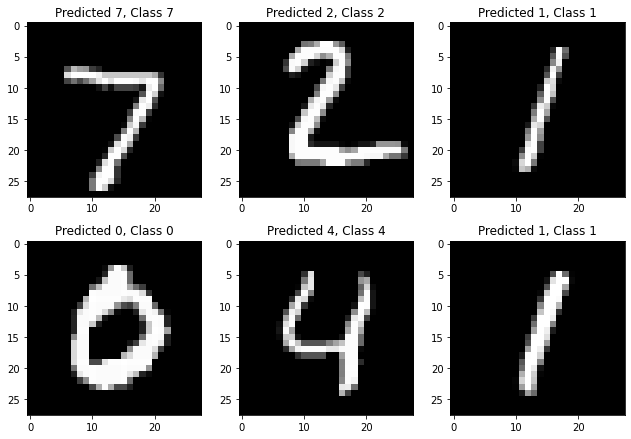

In [11]:
plt.figure()
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    
plt.tight_layout()

... and a few where the network is wrong!

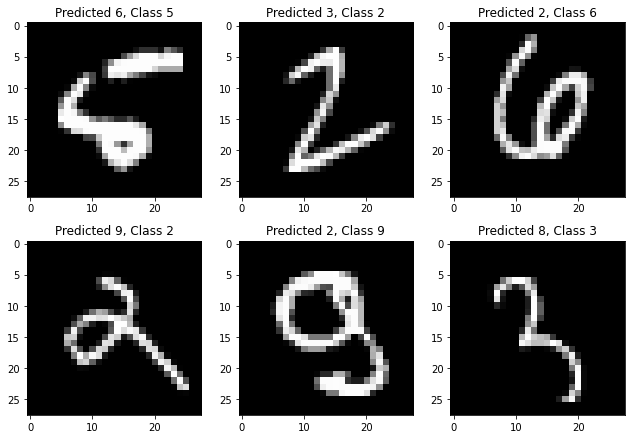

In [12]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    
plt.tight_layout()

And finally the accuracy and loss along the training epochs can be plotted :

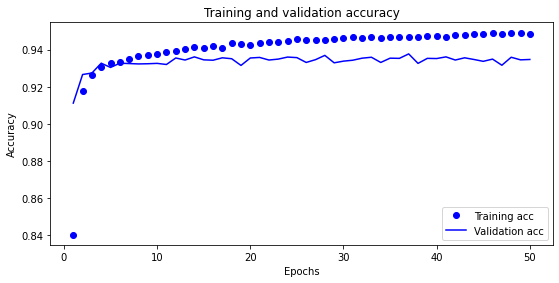

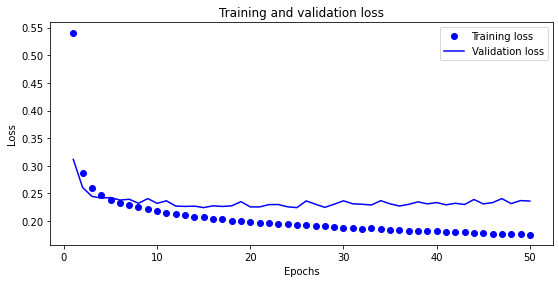

In [13]:
history_dict = history.history

# Plot the evolution of the accuracy during the training
# ------------------------------------------------------

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

n = len(acc_values)
epochs = range(1, n+1)

plt.subplot(2,1,1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the evolution of the loss during the training
# ------------------------------------------------------

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.subplot(2,1,2)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## V- Introduction to CNN = Convolutional Neural Network

Let's move to the next step, improving the model performace: convolutional nets.

In order to work with densely connected network, the images need to be reshape and flatten. **Useful spatial information is lost in this process**. 
**Convolutional network** has been introduced to work with 2D/3D images and analyze the spatial context around the pixels. Such network are able to **learn which features of your image (curve, intensity, shape, etc.) are important for the classficiation**. 
The network will learn **"filters"** that will be applied to each image in order to highlight specific features of your images.   



To start we need to reload the MNIST database and import new libraries specific to CNN.

In [14]:
import matplotlib.pyplot as plt
import numpy as np 
import random

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential # model type to be used
from keras import Model # used for the visualization of the features maps
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import TensorBoard  #Visulization of Accuracy and loss

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

A normalization step is again required, though this time we are keeping the shape of the image (28x28 pixels). 
The labels are also changed again to the one-hot format.

In [15]:
X_train = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
X_val = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
# ----------------------------------

X_train /= 255
X_val /= 255

# change the label from single digit to one-hot format
# ----------------------------------------------------

Y_train = np_utils.to_categorical(train_labels)
Y_val = np_utils.to_categorical(test_labels)

Now, we are creating a simple CNN to analyze the images!


In [16]:
modelCNN = Sequential([
    
    # Convolution Layer 1
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 16 different 3x3 kernels -- so 16 feature maps
    MaxPooling2D(pool_size=(2, 2)), # Pool the max values over a 2x2 kernel

    # Convolution Layer 2
    Conv2D(16, (3, 3), activation='relu'), # 16 different 3x3 kernels 
    MaxPooling2D(pool_size=(2, 2)),

    # Convolution Layer 3
    Conv2D(16, (3, 3), activation='relu'), # 16 different 3x3 kernels

    Flatten(), # Flatten final 3x3x16 output matrix into a 144-length vector 

    # Fully Connected Layer 4
    Dense(15), # 15 FCN nodes
    Activation('relu'),
    Dense(10), # Necessary for the last layer since we have 10 classes
    Activation('softmax'),
])
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          2320      
                                                                 
 flatten (Flatten)           (None, 144)              

And finally we are training this network :

In [17]:
%load_ext tensorboard

tb_CNN = TensorBoard('runs/CNN_model', histogram_freq=1)
%tensorboard --logdir runs

modelCNN.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

history = modelCNN.fit(X_train, Y_train, 
          validation_data=(X_val, Y_val),
          epochs=10, batch_size=32,
          verbose=1,
          callbacks=[tb_CNN])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 150), started 0:05:05 ago. (Use '!kill 150' to kill it.)

<IPython.core.display.Javascript object>

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.3049 - accuracy: 0.9019 - val_loss: 0.0860 - val_accuracy: 0.9745
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.0784 - val_accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0632 - accuracy: 0.9807 - val_loss: 0.0624 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0430 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0388 - val_accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0368 - val_accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0361 - val_accuracy

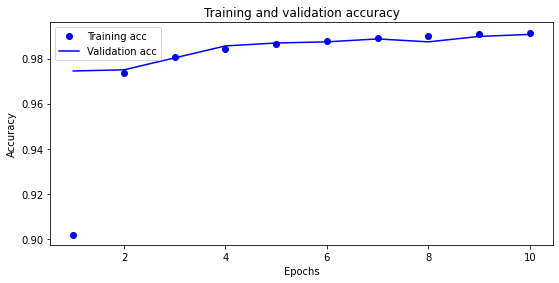

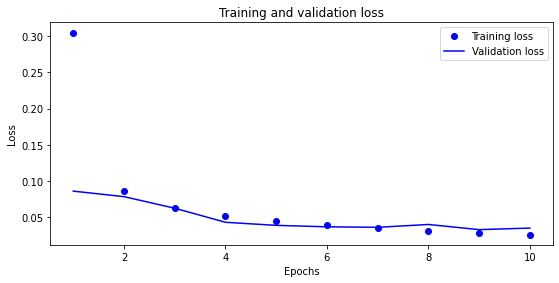

In [18]:
history_dict = history.history

# Plot the evolution of the accuracy during the training
# ------------------------------------------------------

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

n = len(acc_values)
epochs = range(1, n+1)

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

plt.subplot(2,1,1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the evolution of the loss during the training
# ------------------------------------------------------

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.subplot(2,1,2)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##VI- Kernel and features map 

Finally we can visualize what the network is learning. Below, a simple script is used to display the filters that are learnt by the network as well as the feature maps. 

For more details regarding the code you can go [here](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/) and for a user-friendly visualization app [here](https://www.cs.ryerson.ca/~aharley/vis/conv/).

The shape of filters is (3, 3, 1, 16)


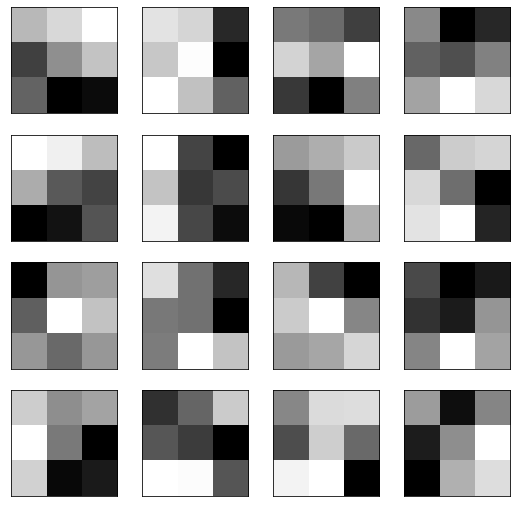

In [19]:
# Indicate the layer you wish to observe (works only for the conv layers)
n_layer = 0

# Retrieve the weights from the chosen layer
filters, biases = modelCNN.layers[n_layer].get_weights()
print('The shape of filters is {}'.format(filters.shape))
	
# normalize filter values between 0-1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot the 16 filters from the convolutional layer

for i in range(16):
	# get the filter
	f = filters[:, :, :, i]

	# plot each filter in gray scale

	ax = plt.subplot(4, 4, i+1)
	ax.set_xticks([])
	ax.set_yticks([])
	plt.imshow(f[:,:,0], cmap='gray')
 
# show the figure
plt.show()

1/1 [==============================] - 0s 38ms/step
The size of features map is (1, 13, 13, 16). There are as many maps as the number of filters in the convolution layer.


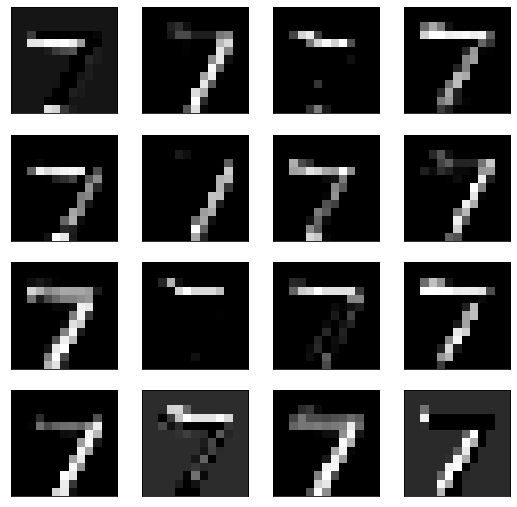

In [23]:
# Select one image from the validation set
n_im = 0

im = X_val[n_im]
im = np.expand_dims(im, axis=0) 

# get feature maps by redefining the model to output only the first hidden layer
n_layer = 1
model = Model(inputs=modelCNN.inputs, outputs=modelCNN.layers[n_layer].output)

feature_maps = model.predict(im)
print("The size of features map is {}. There are as many maps as the number of filters in the convolution layer.".format(feature_maps.shape))
	
# plot all 16 maps

for i in range(16):
	ax = plt.subplot(4, 4, i+1)
	ax.set_xticks([])
	ax.set_yticks([])
	# plot filter channel in grayscale
	plt.imshow(feature_maps[0, :, :, i], cmap='gray')

# show the figure
plt.show()
